In [1]:
import pandas

import warnings; warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

plt.style.use("seaborn-whitegrid")

tanggal = ["order_date"]

url = "/content/clean_data.csv"

In [2]:
origin = pandas.read_table(url, sep=",", parse_dates=tanggal)

origin.iloc[:5, :5]

,order_id,order_status,customer,order_date,order_quantity
0,3,Order Finished,Muhammed Mac Intyre,2010-10-13,6
1,293,Order Finished,Barry French,2012-10-01,49
2,483,Order Finished,Clay Rozendal,2011-07-10,30
3,515,Order Finished,Carlos Soltero,2010-08-28,19
4,613,Order Finished,Carl Jackson,2011-06-17,12


In [3]:
origin.iloc[:5, 5:]

,sales,discount,discount_value,product_category,product_sub_category
0,523080,0.04,20923,Office Supplies,Storage & Organization
1,20246040,0.07,1417223,Office Supplies,Appliances
2,9931519,0.08,794522,Technology,Telephones & Communication
3,788540,0.08,63083,Office Supplies,Appliances
4,187080,0.03,5612,Office Supplies,Binders & Binder Accessories


In [4]:
null = origin.isnull().sum()

null.sum()

0

In [5]:
double = origin.duplicated()

double.sum()

0

In [6]:
len(origin)

5499

In [7]:
origin["order_id"].nunique()

5496

In [8]:
double_order = origin[origin["order_id"].duplicated()]["order_id"].unique()

double_order

array([29795, 31781, 40519])

In [9]:
origin[origin["order_id"].isin(double_order)].iloc[:, :6]

,order_id,order_status,customer,order_date,order_quantity,sales
185,29795,Order Finished,Grant Carroll,2011-11-25,49,38650400
186,29795,Order Cancelled,Grant Carroll,2011-11-25,49,38650400
200,31781,Order Finished,Sylvia Foulston,2009-01-16,46,498040
201,31781,Order Cancelled,Sylvia Foulston,2009-01-16,46,498040
244,40519,Order Cancelled,N UL L,2009-03-13,3,35040
5453,40519,Order Finished,Sandra Glassco,2010-12-21,38,165860


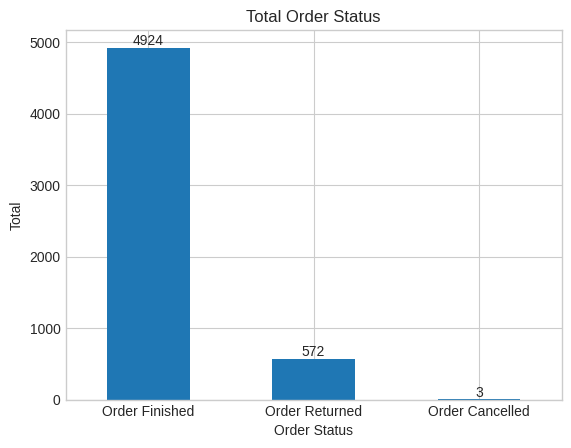

In [10]:
total = origin["order_status"].value_counts()

plot = total.plot.bar(title="Total Order Status", xlabel="Order Status", ylabel="Total", rot=0)

plot.bar_label(plot.containers[0]);

In [11]:
origin = origin[origin["order_status"] == "Order Finished"]

assert origin["order_id"].nunique() == len(origin), "Failed !"

In [12]:
origin["order_status"].unique().tolist()

['Order Finished']

In [13]:
total_sales = origin["sales"].sum()

total_order = origin["sales"].count()

sales_per_order = total_sales / total_order

sales_per_order = round(sales_per_order, 3)

sales_per_order

3506903.459

In [14]:
total_sales, total_order

(17267992632, 4924)

In [15]:
origin["customer"].nunique()

775

In [16]:
tahun = origin["order_date"].dt.year

tahun.unique().tolist()

[2010, 2012, 2011, 2009]

In [17]:
yearly = origin.groupby(tahun)["sales"].agg(["sum", "count"]).round(1)

yearly.columns = ["total_sales", "total_order"]

yearly

,total_sales,total_order
order_date,,
2009,4613872681,1244
2010,4059100607,1248
2011,4112036186,1178
2012,4482983158,1254


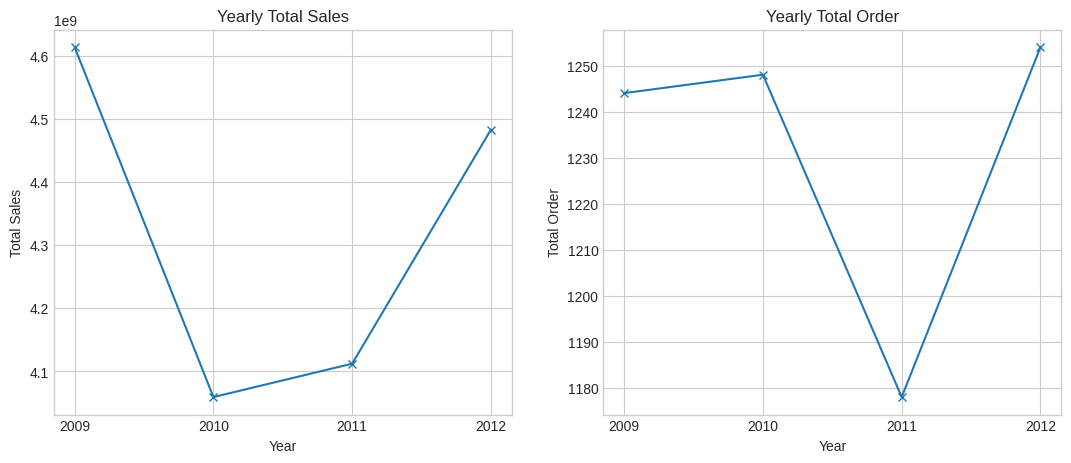

In [18]:
cat, ax = plt.subplots(1, 2, figsize=(13, 5))

sales = yearly["total_sales"].plot.line(
  title="Yearly Total Sales",
  xlabel="Year",
  ylabel="Total Sales",
  ax=ax[0], marker="x"
)

sales.set_xticks(tahun.unique().tolist());

order = yearly["total_order"].plot.line(
  title="Yearly Total Order",
  xlabel="Year",
  ylabel="Total Order",
  ax=ax[1], marker="x"
)

order.set_xticks(tahun.unique().tolist());

In [19]:
yearly["sales_order"] = yearly["total_sales"] / yearly["total_order"]

yearly["sales_order"] = yearly["sales_order"].round(1)

yearly

,total_sales,total_order,sales_order
order_date,,,
2009,4613872681,1244,3708900.9
2010,4059100607,1248,3252484.5
2011,4112036186,1178,3490692.9
2012,4482983158,1254,3574946.7


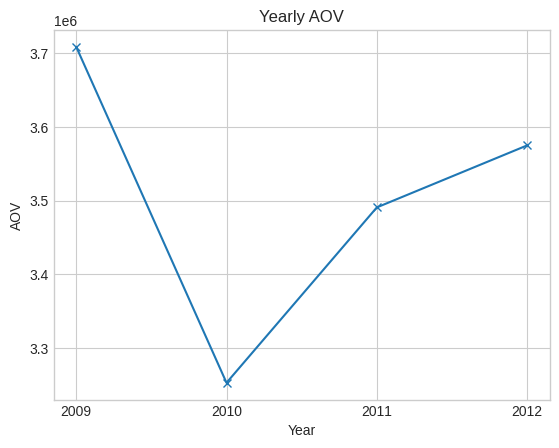

In [20]:
plot = yearly["sales_order"].plot.line(title="Yearly AOV", xlabel="Year", ylabel="AOV", marker="x")

plot.set_xticks(tahun.unique().tolist());

In [21]:
customer = origin.groupby("customer")["sales"].agg(["sum", "count"])

customer.columns = ["total_sales", "total_order"]

customer.iloc[:5]

,total_sales,total_order
customer,,
Aaron Bergman,29520,1
Aaron Hawkins,40827940,7
Aaron Smayling,9911260,8
Adam Bellavance,20988720,9
Adam Hart,29730930,18


In [22]:
t = customer.sort_values("total_sales", ascending=False).iloc[:5]

t

,total_sales,total_order
customer,,
Emily Phan,220589920,8
Deborah Brumfield,182192930,12
Sylvia Foulston,155672633,18
Bill Donatelli,147102789,36
Christina Vanderzanden,143127604,21


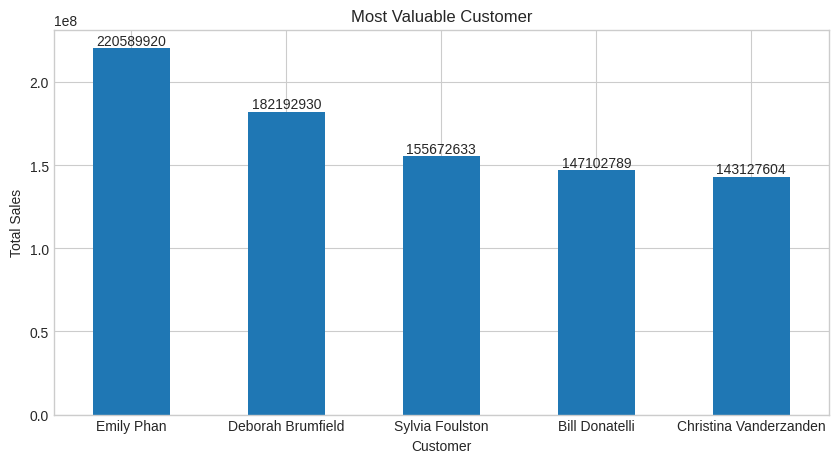

In [23]:
plot = t["total_sales"].plot.bar(title="Most Valuable Customer", rot=0, figsize=(10, 5))

plot.set_ylabel("Total Sales")

plot.set_xlabel("Customer")

plot.bar_label(plot.containers[0], fmt="%d");

In [24]:
customer = origin.groupby("customer")[["order_date"]].min()

tahun = customer.order_date.dt.year

custly = customer.groupby(tahun).count()

custly

,order_date
order_date,
2009,585
2010,141
2011,38
2012,11


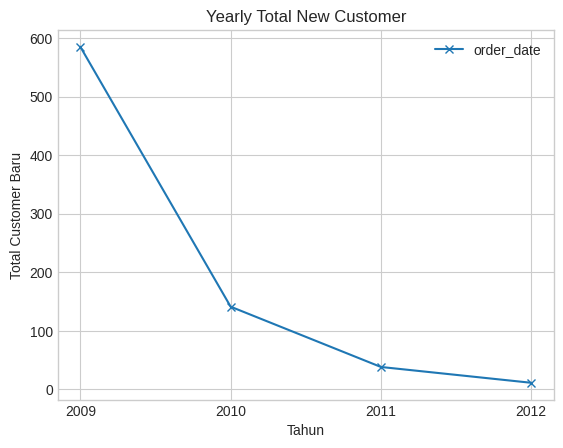

In [25]:
plot = custly.plot.line(title="Yearly Total New Customer", marker="x")

plot.set_xlabel("Tahun")

plot.set_ylabel("Total Customer Baru")

plot.set_xticks(tahun.unique().tolist());